In [1]:
# Abre el archivo para lectura
with open('output.txt', 'r') as archivo:
    cpi = []
    leak = []
    dyn = []
    subdirectorio= []

    for linea in archivo:
        datos = linea.strip().split(',')
        
        # Añade los valores a las variables correspondientes
        cpi.append(float(datos[0]))
        leak.append(float(datos[1]))
        dyn.append(float(datos[2]))
        subdirectorio.append(datos[3])

# Ahora, los valores están almacenados en las variables correspondientes
print("cpi:", cpi)
print("return_leak:", leak)
print("return_dyn:", dyn)
print("subdirectorio_actual:", subdirectorio)


cpi: [1.202829, 1.20913, 1.209141, 1.210288, 1.211205, 1.211201, 1.211408, 1.210012, 1.210382, 1.209895, 1.209298, 1.21234, 1.212327, 1.211049, 1.211738, 1.210626, 1.210769, 1.209614, 1.209361, 1.211132, 1.21122, 1.209954, 1.209767, 1.212174, 1.211223, 1.209847, 1.21026, 1.210466, 1.211043, 1.209486, 1.211015, 1.211585, 1.210593, 1.209614, 1.209361, 1.211132, 1.21122, 1.209954, 1.209767, 1.212174, 1.211223, 1.209847, 1.21026, 1.210466, 1.211043, 1.209486, 1.211015, 1.211585, 1.210593, 1.208226, 1.208904, 1.209218, 1.209261, 1.209178, 1.209138, 1.210651, 1.211138, 1.209363, 1.208774, 1.208671, 1.209336, 1.208246, 1.207363, 1.208755, 1.209886, 1.20651, 1.206519, 1.208568, 1.208516, 1.208632, 1.210397, 1.208901, 1.210097, 1.20767, 1.207968, 1.208751, 1.207996, 1.208545, 1.209666, 1.208065, 1.209154, 1.20651, 1.206519, 1.208568, 1.208516, 1.208632, 1.210397, 1.208901, 1.210097, 1.20767, 1.207968, 1.208751, 1.207996, 1.208545, 1.209666, 1.208065, 1.209154, 1.204993, 1.205329, 1.205701, 1.20

In [2]:
cpi_dir = zip(cpi,subdirectorio)

# 3 mejores simulaciones
print("Mejores simulaciones en terminos de performance: ")
cpi_dir_sorted = sorted(cpi_dir)
# print(cpi_sorted,"\n")
for i in range(3):
     print(cpi_dir_sorted[i])

Mejores simulaciones en terminos de performance: 
(1.201504, ' 265_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=8MB_rob=256_btb=8192_num_ALU=2_issue_width=8')
(1.201504, ' 281_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=16MB_rob=256_btb=8192_num_ALU=2_issue_width=8')
(1.201817, ' 257_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=8MB_rob=192_btb=8192_num_ALU=2_issue_width=8')


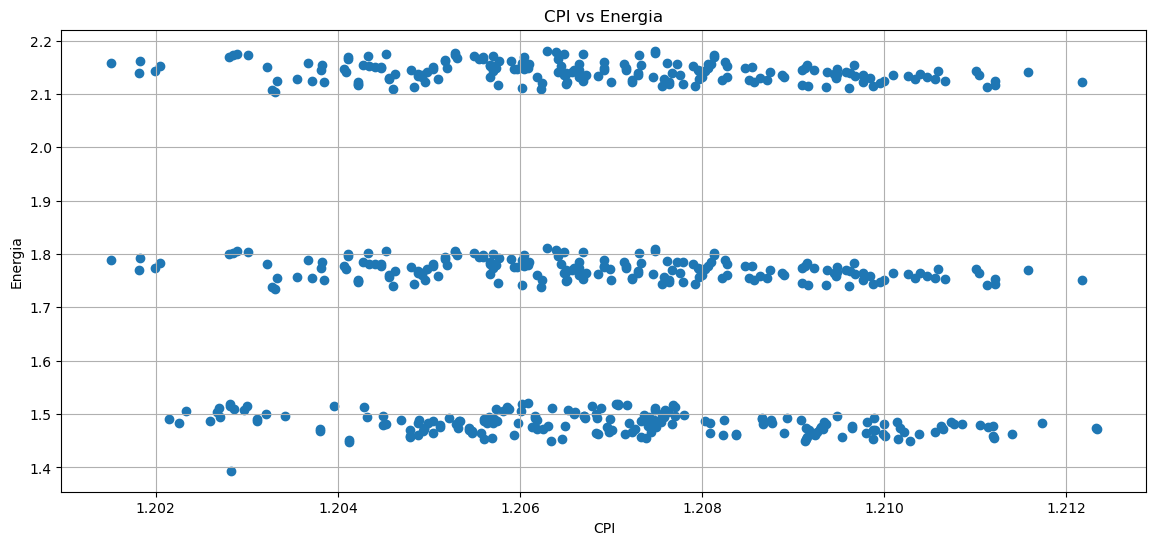

Mejores simulaciones en terminos de energía: 
(1.393786523553, ' 0_mp3_enc')
(1.447588234003, ' 145_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=128kB_l3_size=2MB_rob=192_btb=8192_num_ALU=2_issue_width=8')
(1.4493478571, ' 1_mp3_enc_l1i_size=32kB_l1d_size=32kB_l2_size=128kB_l3_size=2MB_rob=192_btb=8192_num_ALU=2_issue_width=8')


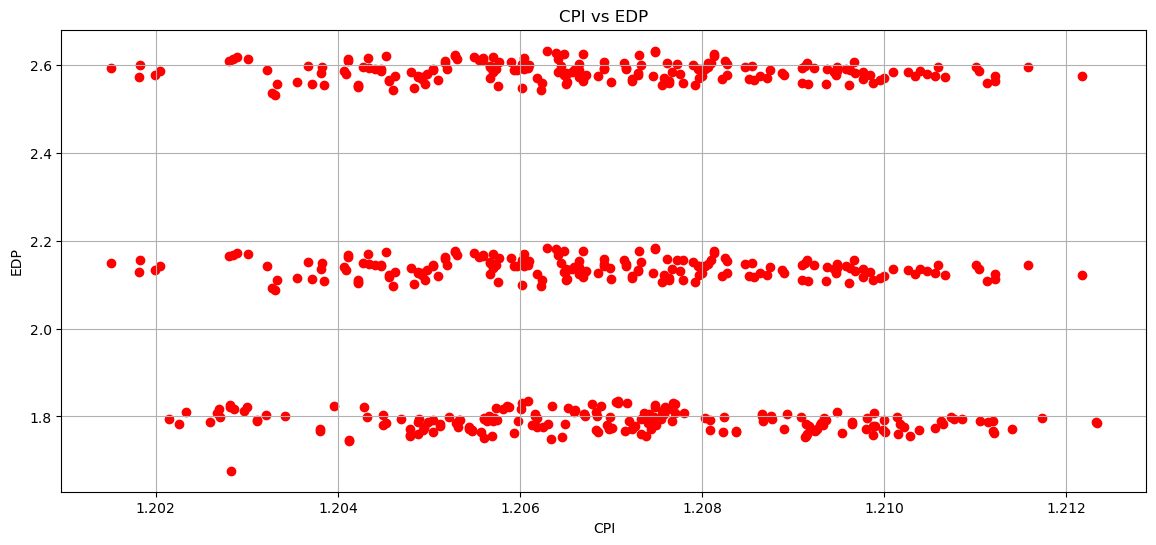

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Computing Energy
energy = []
for i in range(len(cpi)):
    e = (leak[i] + dyn[i]) * cpi[i]
    energy.append(e)
    # print("(",leak[i],"+",dyn[i],")*",cpi[i]," =",e)

data_sorted = sorted(zip(cpi, energy))
cpi_sorted, energy_sorted = zip(*data_sorted) 
plt.figure(figsize=(14, 6))
plt.scatter(cpi_sorted, energy_sorted)
plt.title("CPI vs Energia")
plt.xlabel("CPI")
plt.ylabel("Energia")
plt.grid()
plt.savefig('cpi_energia.png')
plt.show()

# 3 mejores simulaciones energia
print("Mejores simulaciones en terminos de energía: ")
energy_dir = zip(energy,subdirectorio)
energy_dir_sorted = sorted(energy_dir)
# print(cpi_sorted,"\n")
for i in range(3):
     print(energy_dir_sorted[i])
        

# Computing EDP
edp_sorted = [a * b for a, b in zip(energy_sorted, cpi_sorted)]
    
plt.figure(figsize=(14, 6))
plt.scatter(cpi_sorted, edp_sorted, c= "red")
plt.title("CPI vs EDP")
plt.xlabel("CPI")
plt.ylabel("EDP")
plt.grid()
plt.savefig('cpi_edp.png')
plt.show()

(1.202143, ' 245_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=2MB_rob=192_btb=16384_num_ALU=2_issue_width=8')
(1.202251, ' 241_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=2MB_rob=192_btb=8192_num_ALU=2_issue_width=8')
(1.202333, ' 250_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=2MB_rob=256_btb=8192_num_ALU=2_issue_width=12')
(1.202593, ' 242_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=2MB_rob=192_btb=8192_num_ALU=2_issue_width=12')
(1.202669, ' 249_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=2MB_rob=256_btb=8192_num_ALU=2_issue_width=8')
(1.202693, ' 253_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=2MB_rob=256_btb=16384_num_ALU=2_issue_width=8')
(1.202709, ' 246_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=2MB_rob=192_btb=16384_num_ALU=2_issue_width=12')
(1.202816, ' 542_mp3_enc_l1i_size=64kB_l1d_size=64kB_l2_size=512kB_l3_size=2MB_rob=256_btb=16384_num_ALU=2_issue_width=12')
(1.202819, ' 541

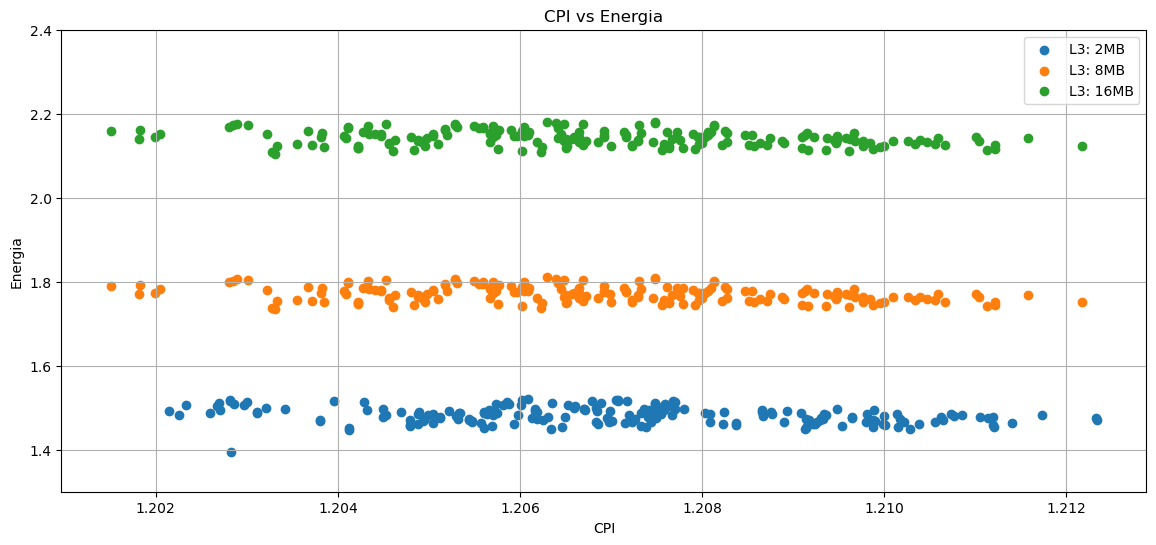

193
192
192
577


In [9]:
energy_group1 =[]
cpi_group1 = []
energy_group2 =[]
cpi_group2 = []
energy_group3 =[]
cpi_group3 = []
e_mean = 0
for i in range(len(cpi_sorted)):
    if(1 < energy_sorted[i] and energy_sorted[i] < 1.6):
        energy_group1.append(energy_sorted[i])
        cpi_group1.append(cpi_sorted[i])
        e_mean += energy_sorted[i]
        #print(energy_sorted[i],cpi_dir_sorted[i])
        print(cpi_dir_sorted[i])
print(" ")
print("Energía promedio, grupo 1:",e_mean/len(energy_group1))
print(" ")

e_mean = 0
for i in range(len(cpi_sorted)):        
    if(1.7 < energy_sorted[i] and energy_sorted[i] < 1.9):
        energy_group2.append(energy_sorted[i])
        cpi_group2.append(cpi_sorted[i])
        e_mean += energy_sorted[i]
        #print(energy_sorted[i],cpi_dir_sorted[i])
        print(cpi_dir_sorted[i])
print(" ")
print("Energía promedio, grupo 2:",e_mean/len(energy_group1))
print(" ")

e_mean = 0
for i in range(len(cpi_sorted)):        
    if(2 < energy_sorted[i] and energy_sorted[i] < 2.2):
        energy_group3.append(energy_sorted[i])
        cpi_group3.append(cpi_sorted[i])
        e_mean += energy_sorted[i]
        #print(energy_sorted[i],cpi_dir_sorted[i])
        print(cpi_dir_sorted[i])
print(" ")
print("Energía promedio, grupo 2:",e_mean/len(energy_group1))        
print(" ")

plt.figure(figsize=(14, 6))
plt.scatter(cpi_group1, energy_group1, label= "L3: 2MB")
plt.scatter(cpi_group2, energy_group2, label= "L3: 8MB")
plt.scatter(cpi_group3, energy_group3, label= "L3: 16MB")
plt.title("CPI vs Energia")
plt.xlabel("CPI")
plt.ylabel("Energia")
plt.grid()
plt.legend()
plt.ylim(1.3,2.4)
plt.savefig('grupos.png')
plt.show()

print(len(cpi_group1))
print(len(cpi_group2))
print(len(cpi_group3))
print(len(cpi_group1)+len(cpi_group2)+len(cpi_group3))

In [6]:
for i in range(len(cpi_dir_sorted)):
    print(cpi_dir_sorted[i])

(1.201504, ' 265_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=8MB_rob=256_btb=8192_num_ALU=2_issue_width=8')
(1.201504, ' 281_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=16MB_rob=256_btb=8192_num_ALU=2_issue_width=8')
(1.201817, ' 257_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=8MB_rob=192_btb=8192_num_ALU=2_issue_width=8')
(1.201817, ' 273_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=16MB_rob=192_btb=8192_num_ALU=2_issue_width=8')
(1.201821, ' 266_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=8MB_rob=256_btb=8192_num_ALU=2_issue_width=12')
(1.201821, ' 282_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=16MB_rob=256_btb=8192_num_ALU=2_issue_width=12')
(1.201985, ' 258_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=8MB_rob=192_btb=8192_num_ALU=2_issue_width=12')
(1.201985, ' 274_mp3_enc_l1i_size=32kB_l1d_size=64kB_l2_size=512kB_l3_size=16MB_rob=192_btb=8192_num_ALU=2_issue_width=12')
(1.202049, ' 262